## Generating the tracking .txt files from the Video

In [ ]:
from utils.boxmot_tracker import run_tracking

video_path = 'Dataset/DJI_0763.MOV'
det_folder = 'Dataset/DJI_0763_detection'
tracking_output_dir = 'Dataset/DJI_0763_tracking'

run_tracking(video_path, det_folder, tracking_output_dir)

## Tracking of vehicles inside the Map

In [ ]:
import os
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from utils.tracking_utils import *

# Define your paths and configurations
video_path = 'Dataset/DJI_0763.MOV'
temp_folder = 'temp_frames'
txt_folder = 'Dataset/DJI_0763_detection'
output_folder = 'selected_frames'

map_image_path = 'results/final_panorama.jpg'
map_image = cv.imread(map_image_path)

inpainted_images_folder = 'images_inpainted'
tracking_folder = 'Dataset/DJI_0763_tracking'

corners_pkl_path = 'results/image_corners.pkl'
image_corners_df = pd.read_pickle(corners_pkl_path)
image_corners_df['frame_number'] = image_corners_df['frame_number'].astype(int)

step_frame = 10  # Process every 10th frame

# List all items in the folder to determine frame ranges
frame_files = sorted([f for f in os.listdir(inpainted_images_folder) if f.endswith('.jpg')])
frame_numbers = [int(os.path.splitext(f)[0]) for f in frame_files]  # Extract frame numbers

# Initialize list to store all trajectories dictionaries
all_trajectories = []

for i in range(0, len(frame_numbers)):
    # Define start and end frames for the current batch
    start_frame = frame_numbers[i]
    if i + 1 >= len(frame_numbers):
        break

    if (frame_numbers[i] > 2000 and frame_numbers[i] < 2800) or (frame_numbers[i] > 5500 and frame_numbers[i] < 6000):
        continue
    end_frame = frame_numbers[i + 1]

    print(f"Processing frames from {start_frame} to {end_frame}...")

    # Call the select_frames function
    select_frames(
        video_path=video_path,
        temp_folder=temp_folder,
        txt_folder=txt_folder,
        output_folder=output_folder,
        start_frame=start_frame,
        step_frame=step_frame,
        end_frame=end_frame,
    )

    # Initialize a new trajectories dictionary for this batch
    trajectories = defaultdict(list)

    # Call the track_vehicles_in_between_frames function
    trajectories = track_vehicles_in_between_frames(
        map_image=map_image,
        df=image_corners_df,
        images_folder=output_folder,
        bounding_data_folder=tracking_folder,
        start_frame=start_frame,
        end_frame=end_frame,
        step_frame=step_frame,
        trajectories=trajectories,
    )

    # Add this batch's trajectories to the list
    all_trajectories.append(trajectories)

# Save the trajectories list to a pickle file
trajectories_pkl_path = 'results/trajectories.pkl'
pd.to_pickle(all_trajectories, trajectories_pkl_path)

## Post Processing the vehicles' trajectories

weights: /Users/user/Documents/EPFL/MA3/PDS_LUTS/GitHub/boxmot/tracking/weights
number of vehicles shown is: 462
number of vehicles skipped is: 465
Percenatge of vehicles shown is: 99.35483870967742


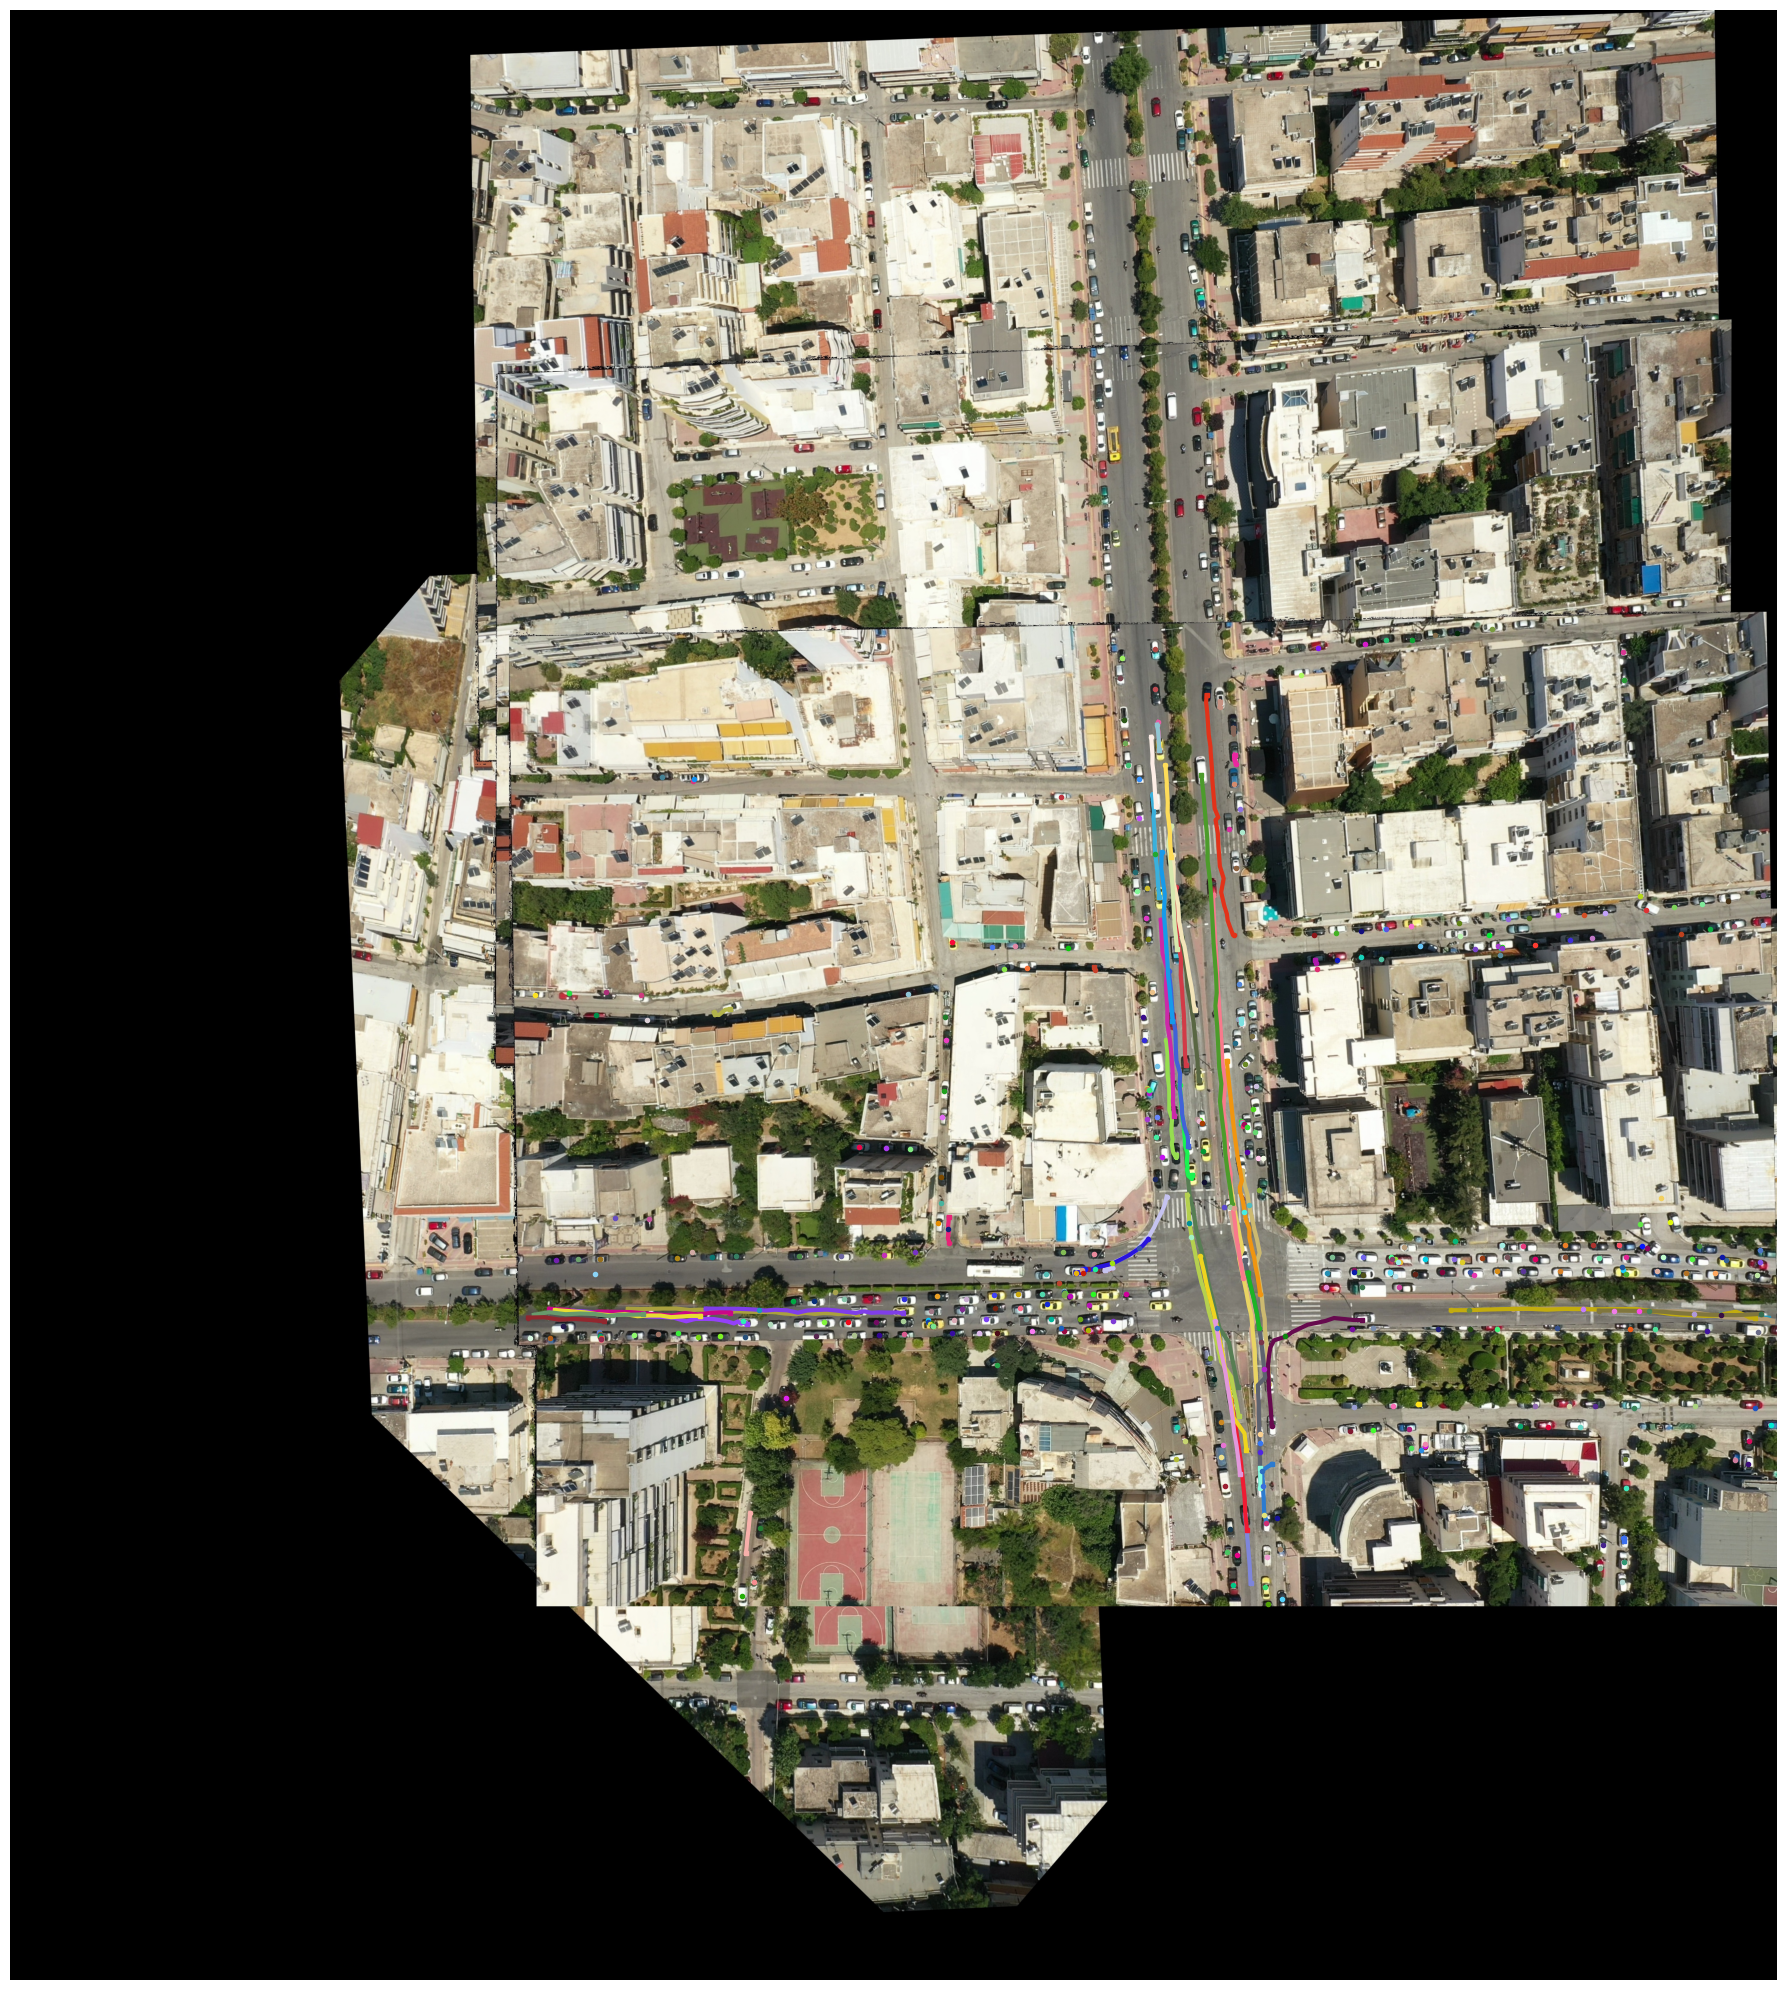

In [1]:
import pickle
import matplotlib.pyplot as plt
import random
import cv2 as cv
import numpy as np
import os
import pandas as pd
from utils.post_processing import *

map_image_path = 'results/final_panorama.jpg'
map_image = cv.imread(map_image_path)

trajectories_pkl_path = 'results/trajectories.pkl'
all_trajectories = pd.read_pickle(trajectories_pkl_path)

# Define the output folder for the images
output_image = 'results/map_with_trajectories.jpg'

post_process_trajectories(
    map_image=map_image,
    loaded_dict=all_trajectories,
    marker_size=3
)
